## ***Исследование мирового рынка удобрений в временной период с 2015 по 2019 г***

**Источник данных**: набор данных "Удобрения по продуктам" с сайта ФАО(Продовольственная и сельскохозяйственная организация ООН), который содержит информацию о про-ве, торговле и использовании неорганических удобрений в с/х.

***Цели исследования:*** 
- выявить страны, которые лидируют в экспорте, импорте, производстве и использовании различных удобрений.
- выявить самые популярные виды удобрений в разрезе экспорта/импорта, производства и использования в с/х.

## Загрузка библиотек

In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
import seaborn as sns
import plotly.express as px

## Загрузка файла, обзор датафрейма

In [2]:
from google.colab import files
uploaded = files.upload()

Saving all firt,2015-2019.csv to all firt,2015-2019.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['all firt,2015-2019.csv']))

In [4]:
df.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RFB,Fertilizers by Product,2,Afghanistan,5610,Import Quantity,4007,"Ammonia, anhydrous",2017,2017,tonnes,2.07,R,Estimated data using trading partners database
1,RFB,Fertilizers by Product,2,Afghanistan,5610,Import Quantity,4007,"Ammonia, anhydrous",2018,2018,tonnes,28.19,R,Estimated data using trading partners database
2,RFB,Fertilizers by Product,2,Afghanistan,5622,Import Value,4007,"Ammonia, anhydrous",2017,2017,1000 US$,1.24,R,Estimated data using trading partners database
3,RFB,Fertilizers by Product,2,Afghanistan,5622,Import Value,4007,"Ammonia, anhydrous",2018,2018,1000 US$,5.44,R,Estimated data using trading partners database
4,RFB,Fertilizers by Product,2,Afghanistan,5610,Import Quantity,4002,Ammonium sulphate,2015,2015,tonnes,190.07,R,Estimated data using trading partners database


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52646 entries, 0 to 52645
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       52646 non-null  object 
 1   Domain            52646 non-null  object 
 2   Area Code (FAO)   52646 non-null  int64  
 3   Area              52646 non-null  object 
 4   Element Code      52646 non-null  int64  
 5   Element           52646 non-null  object 
 6   Item Code         52646 non-null  int64  
 7   Item              52646 non-null  object 
 8   Year Code         52646 non-null  int64  
 9   Year              52646 non-null  int64  
 10  Unit              52646 non-null  object 
 11  Value             52646 non-null  float64
 12  Flag              52646 non-null  object 
 13  Flag Description  52646 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 5.6+ MB


## Предообработка данных

### Удаление лишних столбцов

In [6]:
df = df.drop(columns=['Domain Code', 'Area Code (FAO)', 'Element Code', 'Item Code', 'Year Code', 'Flag Description', 'Flag', 'Domain'])

In [7]:
df.head()

,Area,Element,Item,Year,Unit,Value
0,Afghanistan,Import Quantity,"Ammonia, anhydrous",2017,tonnes,2.07
1,Afghanistan,Import Quantity,"Ammonia, anhydrous",2018,tonnes,28.19
2,Afghanistan,Import Value,"Ammonia, anhydrous",2017,1000 US$,1.24
3,Afghanistan,Import Value,"Ammonia, anhydrous",2018,1000 US$,5.44
4,Afghanistan,Import Quantity,Ammonium sulphate,2015,tonnes,190.07


### Наличие пропусков

In [8]:
df.isna().sum()

Area       0
Element    0
Item       0
Year       0
Unit       0
Value      0
dtype: int64

### Наличие дубликатов

In [9]:
df.duplicated().sum()

0

In [10]:
df['Element'].value_counts()

Import Quantity     14466
Import Value        14466
Export Quantity      8227
Export Value         8227
Agricultural Use     3880
Production           3380
Name: Element, dtype: int64

In [11]:
df['Item'].value_counts()

Urea                                                                        3105
NPK fertilizers                                                             2987
Fertilizers n.e.c.                                                          2924
Other nitrogenous fertilizers, n.e.c.                                       2922
Potassium chloride (muriate of potash) (MOP)                                2770
Ammonium sulphate                                                           2738
Ammonium nitrate (AN)                                                       2564
Other NP compounds                                                          2560
Ammonia, anhydrous                                                          2508
Diammonium phosphate (DAP)                                                  2462
Potassium sulphate (sulphate of potash) (SOP)                               2438
Other potassic fertilizers, n.e.c.                                          2417
PK compounds                

In [12]:
df['Unit'].value_counts()

tonnes      29953
1000 US$    22693
Name: Unit, dtype: int64

In [13]:
df['Year'].value_counts()

2017    10906
2016    10855
2015    10709
2018    10546
2019     9630
Name: Year, dtype: int64

In [14]:
df['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chile', 'China, mainland', 'China, Taiwan Province of',
       'Colombia', 'Congo', 'Cook Islands', 'Costa Rica', "C?te d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of the Congo', 'Denmark', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea',
       'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Guatemala', 'Gu

In [15]:
df['Area']= df['Area'].replace("T?rkiye", "Turkiye")

In [16]:
df.head()

,Area,Element,Item,Year,Unit,Value
0,Afghanistan,Import Quantity,"Ammonia, anhydrous",2017,tonnes,2.07
1,Afghanistan,Import Quantity,"Ammonia, anhydrous",2018,tonnes,28.19
2,Afghanistan,Import Value,"Ammonia, anhydrous",2017,1000 US$,1.24
3,Afghanistan,Import Value,"Ammonia, anhydrous",2018,1000 US$,5.44
4,Afghanistan,Import Quantity,Ammonium sulphate,2015,tonnes,190.07


## EDA

***Топ-10 стран, осуществляющие импорт удобрений, в тоннах***

In [17]:
item_import_quantity=df.query('Element=="Import Quantity"').groupby(('Area')).agg({'Value':'sum'}).sort_values(by='Value', ascending=False)

In [18]:
differense = []
for i in range(len(item_import_quantity)):
  differense.append(round((item_import_quantity['Value'][i]/item_import_quantity['Value'].sum() * 100),3))
item_import_quantity['Share'] = differense

In [19]:
item_import_quantity.head(10)

,Value,Share
Area,,
United States of America,1.555344e+08,11.887
India,1.451500e+08,11.094
Brazil,1.441641e+08,11.018
"China, mainland",5.333034e+07,4.076
Indonesia,4.561359e+07,3.486
France,4.430033e+07,3.386
Belgium,3.300528e+07,2.523
Turkiye,3.289795e+07,2.514
Thailand,2.813692e+07,2.150


***Топ-10 стран, осуществляющие импорт удобрений, в 1000 US $***

In [20]:
item_import_value=df.query('Element=="Import Value"').groupby(('Area')).agg({'Value':'sum'}).sort_values(by='Value', ascending=False)

In [21]:
differense = []
for i in range(len(item_import_value)):
  differense.append(round((item_import_value['Value'][i]/item_import_value['Value'].sum() * 100),3))
item_import_value['Share'] = differense

In [22]:
item_import_value.head(10)

,Value,Share
Area,,
United States of America,42516174.72,11.553
Brazil,38890012.35,10.567
India,37598074.94,10.216
"China, mainland",16255810.99,4.417
France,11495540.56,3.124
Indonesia,9736792.23,2.646
Thailand,9098017.27,2.472
Belgium,8735921.67,2.374
Turkiye,8226867.66,2.235


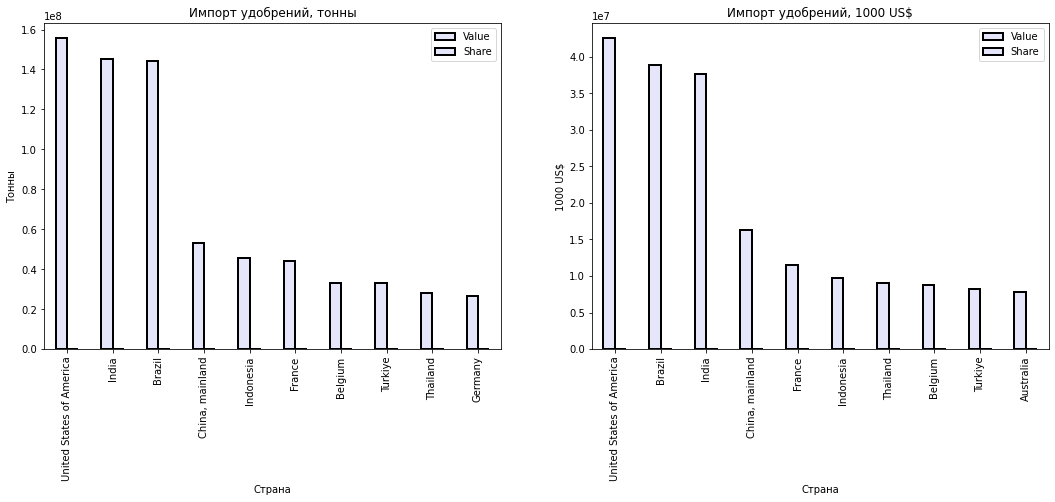

In [23]:
fig, axes = plt.subplots(1,2, figsize=(25,20))       

item_import_quantity.head(10).plot(kind='bar', figsize=(18,6), legend = True, color = 'lavender',edgecolor='black',linewidth=2, ax=axes[0]);
axes[0].set_title('Импорт удобрений, тонны');
axes[0].set_ylabel('Тонны')
axes[0].set_xlabel('Страна')
item_import_value.head(10).plot(kind='bar', figsize=(18,6), legend = True, color = 'lavender',edgecolor='black',linewidth=2, ax=axes[1]);
axes[1].set_title('Импорт удобрений, 1000 US$')
axes[1].set_ylabel('1000 US$')
axes[1].set_xlabel('Страна');  

Лидеры топ-5 по импорту удобрений в тоннах являются следующие страны:
- Соединенные штаты Америки (United States of America)
- Индия (India)
- Бразилия (Brazil)
- Материковый Китай (China, mainland) 
- Индонезия (Indonesia) 

Лидеры топ-5 по импорту удобрений в $ являются следующие страны:
- Соединенные штаты Америки (United States of America)
- Бразилия (Brazil)
- Индия (India)
- Материковый Китай (China, mainland)
- Франция (France)

***Топ-10 стран, осуществляющие экспорт удобрений, в тоннах***

In [24]:
item_export_value=df.query('Element=="Export Value"').groupby(('Area')).agg({'Value':'sum'}).sort_values(by='Value', ascending=False)

In [25]:
differense = []
for i in range(len(item_export_value)):
  differense.append(round((item_export_value['Value'][i]/item_export_value['Value'].sum() * 100),3))
item_export_value['Share'] = differense

In [26]:
item_export_value.head(10)

,Value,Share
Area,,
Russian Federation,50193758.75,14.697
"China, mainland",38827723.02,11.369
Canada,28587523.30,8.371
United States of America,16970898.46,4.969
Morocco,16939164.59,4.960
Belarus,14740787.70,4.316
Saudi Arabia,13880398.43,4.064
Germany,12201859.19,3.573
Netherlands,10972021.96,3.213


***Топ-10 стран, осуществляющие экспорт удобрений, в 1000 US $***

In [27]:
item_export_quantity=df.query('Element=="Export Quantity"').groupby(('Area')).agg({'Value':'sum'}).sort_values(by='Value', ascending=False)

In [28]:
differense = []
for i in range(len(item_export_value)):
  differense.append(round((item_export_quantity['Value'][i]/item_export_quantity['Value'].sum() * 100),3))
item_export_quantity['Share'] = differense

In [29]:
item_export_quantity.head(10)

,Value,Share
Area,,
Russian Federation,2.183365e+08,16.799
"China, mainland",1.442028e+08,11.095
Canada,1.108539e+08,8.529
Morocco,8.466260e+07,6.514
Belarus,5.605289e+07,4.313
United States of America,4.645346e+07,3.574
Netherlands,4.522526e+07,3.480
Saudi Arabia,4.132668e+07,3.180
Germany,3.986907e+07,3.068


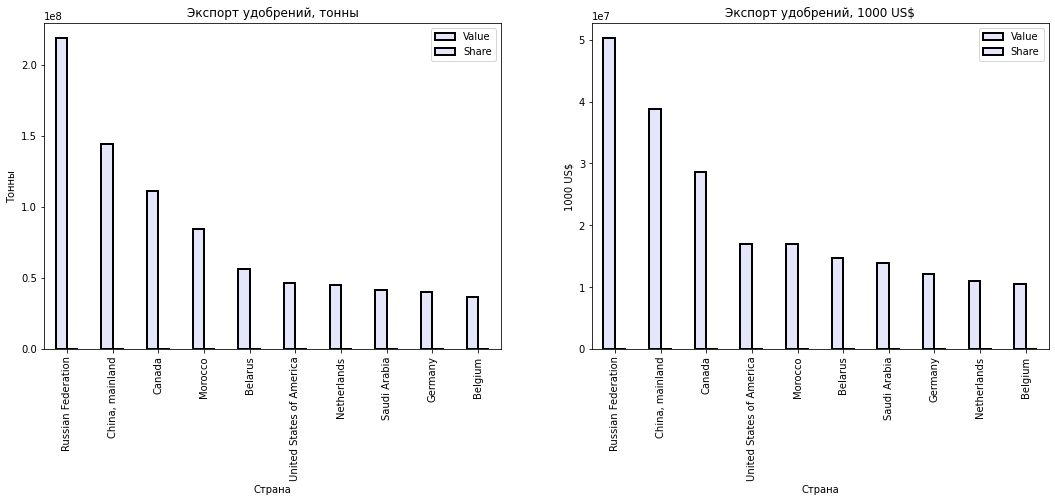

In [30]:
fig, axes = plt.subplots(1,2, figsize=(25,20))       

item_export_quantity.head(10).plot(kind='bar', figsize=(18,6), legend = True, color = 'lavender',edgecolor='black',linewidth=2, ax=axes[0]);
axes[0].set_title('Экспорт удобрений, тонны');
axes[0].set_ylabel('Тонны')
axes[0].set_xlabel('Страна')
item_export_value.head(10).plot(kind='bar', figsize=(18,6), legend = True, color = 'lavender',edgecolor='black',linewidth=2, ax=axes[1]);
axes[1].set_title('Экспорт удобрений, 1000 US$')
axes[1].set_ylabel('1000 US$')
axes[1].set_xlabel('Страна');  

Лидеры топ-5 по экспорту удобрений в тоннах являются следующие страны:
- Российская Федерация (Russian Federation)
- Материковый Китай (China, mainland)
- Канада (Canada)
- Морокко (Morocco)
- Беларусь (Belarus)

Лидеры топ-5 по экспорту удобрений в $ являются следующие страны:
- Российская Федерация (Russian Federation)
- Материковый Китай (China, mainland)
- Канада (Canada)
- Соединенные штаты Америки (United States of America)
- Морокко (Morocco)


***Топ-10 стран, использующие удобрения в с/х, тонны***

In [31]:
item_agricultural_use=df.query('Element=="Agricultural Use"').groupby(('Area')).agg({'Value':'sum'}).sort_values(by='Value', ascending=False)

In [32]:
differense = []
for i in range(len(item_agricultural_use)):
  differense.append(round((item_agricultural_use['Value'][i]/item_agricultural_use['Value'].sum() * 100),3))
item_agricultural_use['Share'] = differense

In [33]:
item_agricultural_use.head(10)

,Value,Share
Area,,
India,3.124148e+08,30.760
United States of America,2.248606e+08,22.140
Indonesia,4.887366e+07,4.812
Pakistan,4.661049e+07,4.589
Egypt,4.300456e+07,4.234
Canada,4.123600e+07,4.060
France,3.520243e+07,3.466
Mexico,3.442487e+07,3.389
Turkiye,2.651210e+07,2.610


***Топ-10 стран, производящие удобрения, тонны***

In [34]:
item_production=df.query('Element=="Production"').groupby(('Area')).agg({'Value':'sum'}).sort_values(by='Value', ascending=False)

In [35]:
differense = []
for i in range(len(item_production)):
  differense.append(round((item_production['Value'][i]/item_production['Value'].sum() * 100),3))
item_production['Share'] = differense

In [36]:
item_production.head(10)

,Value,Share
Area,,
United States of America,2.924036e+08,18.599
Russian Federation,2.233199e+08,14.205
India,2.102689e+08,13.375
Canada,1.161800e+08,7.390
Belarus,7.760145e+07,4.936
Brazil,7.277818e+07,4.629
Indonesia,5.627569e+07,3.580
Poland,5.204427e+07,3.310
Viet Nam,4.631730e+07,2.946


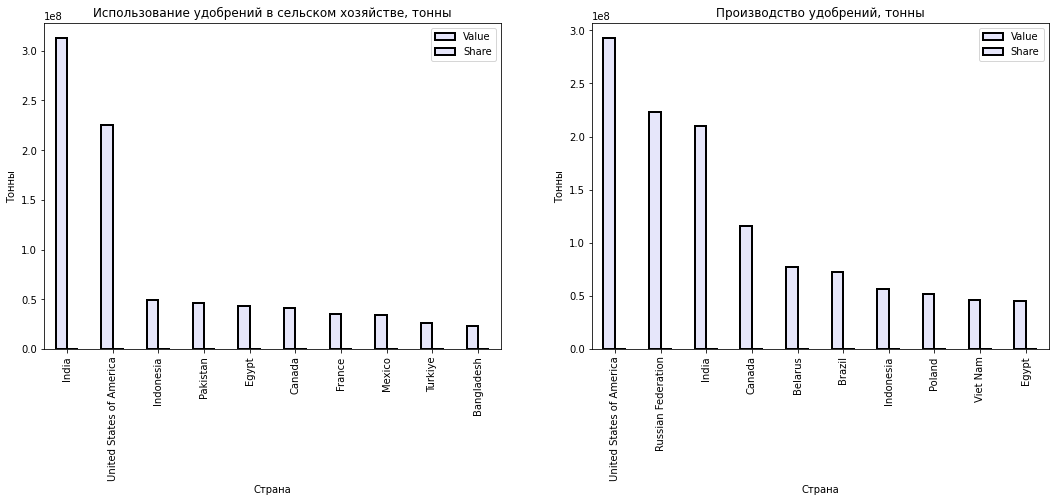

In [37]:
fig, axes = plt.subplots(1,2, figsize=(25,20))       

item_agricultural_use.head(10).plot(kind='bar', figsize=(18,6), legend = True, color = 'lavender',edgecolor='black',linewidth=2, ax=axes[0]);
axes[0].set_title('Использование удобрений в сельском хозяйстве, тонны');
axes[0].set_ylabel('Тонны')
axes[0].set_xlabel('Страна')
item_production.head(10).plot(kind='bar', figsize=(18,6), legend = True, color = 'lavender',edgecolor='black',linewidth=2, ax=axes[1]);
axes[1].set_title('Производство удобрений, тонны')
axes[1].set_ylabel('Тонны')
axes[1].set_xlabel('Страна');  

Лидеры топ-5 по использованию удобрений в с/х (тонны) являются следующие страны:
- Индия (India)
- Соединенные штаты Америки (United States of America)
- Индонезия (Indonesia)
- Пакистан (Pakistan)
- Египет (Egypt)

Лидеры топ-5 по производству удобрений в с/х (тонны) являются следующие страны:
- Соединенные штаты Америки (United States of America)
- Российская Федерация (Russian Federation)
- Индия (India)
- Канада (Canada)
- Белорусь (Belarus)


***Суммарное количество импорта/экспорта каждого вида удобрений с 2015 по 2019 года, тонны***

In [38]:
df_item_import = df.query("Element=='Import Quantity'").groupby(['Item'])['Value'].sum().sort_values(ascending=False)
df_item_import

Item
Potassium chloride (muriate of potash) (MOP)                                2.612679e+08
Urea                                                                        2.498038e+08
Phosphate rock                                                              1.397876e+08
Ammonia, anhydrous                                                          9.051075e+07
NPK fertilizers                                                             8.494416e+07
Diammonium phosphate (DAP)                                                  8.185997e+07
Ammonium sulphate                                                           6.510836e+07
Monoammonium phosphate (MAP)                                                5.114807e+07
Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate    4.827450e+07
Urea and ammonium nitrate solutions (UAN)                                   4.204385e+07
Ammonium nitrate (AN)                                                       4.128223e+07
Other NP compoun

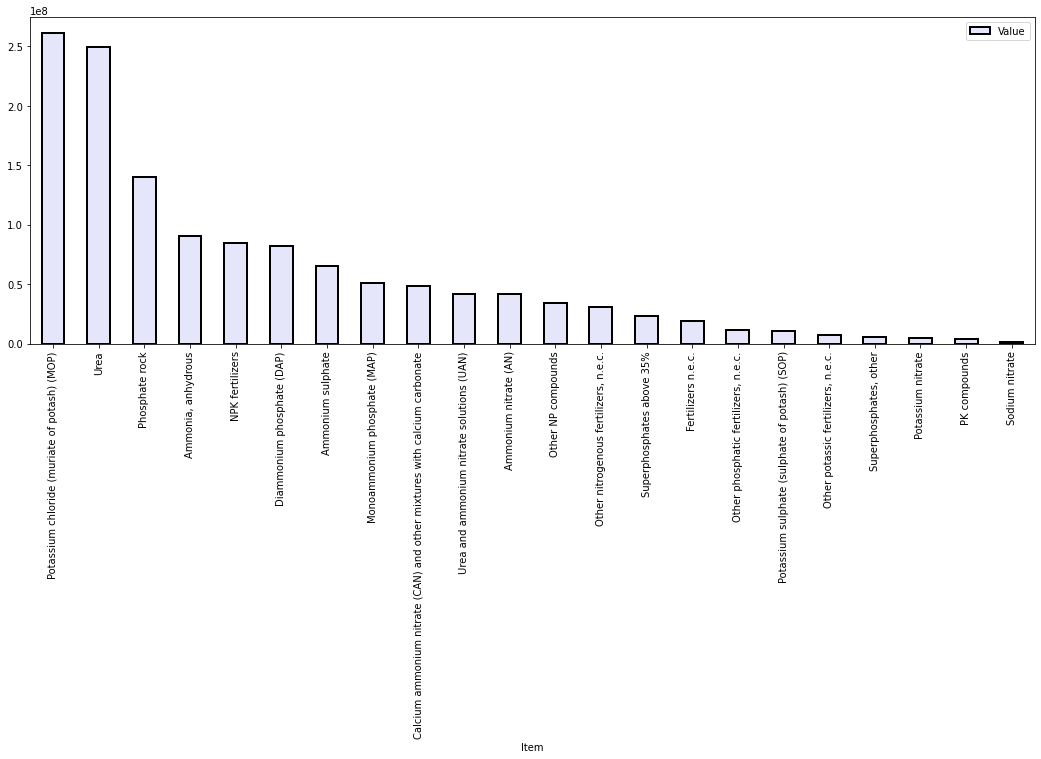

In [39]:
df_item_import.plot(kind='bar', figsize=(18,6), legend = True, color = 'lavender',edgecolor='black',linewidth=2);

Среди всех представленных видов удобрений больше всего экспорируют/импортируют(тонны) в период с 2015 по 2019 год следующие удобрения:

- Potassium chloride (muriate of potash) (MOP) (Хлорид калия) - 2.612679e+08 т
- Urea (Мочевина (или карбамид)) - 2.498038e+08 т
- Phosphate rock (Фосфоритная мука) - 1.397876e+08 т
- Ammonia, anhydrous (Аммиак) - 9.051075e+07 т
- NPK fertilizers (комплексные удобрения) - 8.494416e+07 т

Меньше всего экспортируют/импортируют в количественном эквиваленте:
- Sodium nitrate (селитра натриевая) - 1.287207e+06 т.
- PK compounds (фосфорно-калийные удобрения) - 3.981092e+06 т.
- Potassium nitrate (селитра калиевая) - 4.986954e+06 т.

**Суммарное количество импорта/экспорта каждого вида удобрений с 2015 по 2019 года, 1000 US $**

In [65]:
df_item_export_value = df.query("Element=='Export Value'").groupby(['Item'])['Value'].sum().sort_values(ascending=False)
df_item_export_value 

Item
Potassium chloride (muriate of potash) (MOP)                                67076317.93
Urea                                                                        62907587.42
Diammonium phosphate (DAP)                                                  34039361.23
NPK fertilizers                                                             31782464.80
Ammonia, anhydrous                                                          28237066.18
Monoammonium phosphate (MAP)                                                21626366.87
Phosphate rock                                                              13003256.24
Other NP compounds                                                          10562642.77
Ammonium nitrate (AN)                                                        9978272.53
Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate     9956954.87
Ammonium sulphate                                                            9184043.94
Fertilizers n.e.c.         

In [ ]:
df_item_export_value.plot(kind='bar', figsize=(18,6), legend = True, color = 'lavender',edgecolor='black',linewidth=2);

Среди всех представленных видов удобрений больше всего экспортируют/ипортируют (1000 US $) в период с 2015 по 2019 год следующие удобрения:

- Potassium chloride (muriate of potash) (MOP) (Хлорид калия) - 67076317.93
- Urea (Мочевина (или карбамид)) - 62907587.42
- Diammonium phosphate (DAP) (Диаммонийфосфат) - 34039361.23
- NPK fertilizers (комплексные удобрения) - 31782464.80
- Ammonia, anhydrous (Аммиак) - 28237066.18

Меньше всего импортируют/экспортируют в денежном эквиваленте:
- Sodium nitrate (селитра натриевая) - 541417.87.
- Superphosphates, other - 550230.17
- Other phosphatic fertilizers, n.e.c - 630346.05

***Динамика производства каждого вида удобрений с 2015 по 2019 года, тонны***

In [42]:
df_year_production = df.query("Element=='Production'").groupby(['Year','Item'])['Value'].sum().reset_index()
df_year_production

,Year,Item,Value
0,2015,"Ammonia, anhydrous",41564697.21
1,2015,Ammonium nitrate (AN),17983574.42
2,2015,Ammonium sulphate,11769901.58
3,2015,Calcium ammonium nitrate (CAN) and other mixtu...,4074758.17
4,2015,Diammonium phosphate (DAP),13999614.45
...,...,...,...
110,2019,Sodium nitrate,31752.00
111,2019,Superphosphates above 35%,1894523.00
112,2019,"Superphosphates, other",10257004.00
113,2019,Urea,72408457.74


In [43]:
fig = px.line(df_year_production, x='Year', y='Value', color='Item', markers=True)
fig.update_xaxes(tickvals=[2015, 2016, 2017, 2018, 2019])

fig.show()

- Больше всего производят удобрение Urea (Мочевина (или карбамид)), пик производства был в 2016 году, далее идет спад производства.
- Phosphate rock (Фосфоритная мука) производили больше всего в 2015 и в 2016 году, далее идет резкий спад.
- Potassium chloride (muriate of potash) (MOP) (Хлорид калия) в 2017 году демонстриурет рост производства, превосходя по объему Phosphate rock (Фосфоритная мука) далее в 2018 году идет резкий спад.
- Ammonia, anhydrous (Аммиак) больше произвродили в 2015-2016гг, далее идет спад производства.
- Остальные удобрения показывают ровне показатели на протяжении исследуемого периода.

***Динамика использования каждого вида удобрений в с/х с 2015 по 2019 года, тонны***

In [44]:
df_year_use = df.query("Element=='Agricultural Use'").groupby(['Year','Item'])['Value'].sum().reset_index()
df_year_use

,Year,Item,Value
0,2015,"Ammonia, anhydrous",4607588.45
1,2015,Ammonium nitrate (AN),5646802.16
2,2015,Ammonium sulphate,39070742.80
3,2015,Calcium ammonium nitrate (CAN) and other mixtu...,5018199.79
4,2015,Diammonium phosphate (DAP),18268961.26
...,...,...,...
110,2019,Sodium nitrate,2446.33
111,2019,Superphosphates above 35%,2009296.49
112,2019,"Superphosphates, other",7992183.00
113,2019,Urea,65220948.22


In [45]:
fig = px.line(df_year_use, x='Year', y='Value', color='Item', markers=True)
fig.update_xaxes(tickvals=[2015, 2016, 2017, 2018, 2019])

fig.show()

- Явным лидером по применению в с/х является удобрение Urea (Мочевина (или карбамид))
- После 2015 года идет резкий спад использования удобрения Ammonium sulphate (сульфат аммония)
- Остальные удобрения используют ровно без заметных скачков и спадов

***Динамика количества импорта каждого вида удобрений с 2015 по 2019 года для топ-5 импортеров, тонны***

In [46]:
list_1 = ['United States of America', 'India', 'Brazil', 'China, mainland', 'Indonesia']

In [47]:
for i in list_1:
  data_1=df.query("Element=='Import Quantity'").groupby(['Area','Year','Item'])['Value'].sum().reset_index()
  fig = px.line(data_1.loc[data_1['Area'].isin([i])], x='Year', y='Value', color='Item', markers=True,title=i)
  fig.show()

In [48]:
df['Item'].unique()

array(['Ammonia, anhydrous', 'Ammonium sulphate',
       'Diammonium phosphate (DAP)', 'Fertilizers n.e.c.',
       'Monoammonium phosphate (MAP)', 'NPK fertilizers',
       'Other nitrogenous fertilizers, n.e.c.', 'Other NP compounds',
       'Other phosphatic fertilizers, n.e.c.',
       'Other potassic fertilizers, n.e.c.', 'Phosphate rock',
       'PK compounds', 'Potassium chloride (muriate of potash) (MOP)',
       'Potassium nitrate',
       'Potassium sulphate (sulphate of potash) (SOP)', 'Sodium nitrate',
       'Urea', 'Ammonium nitrate (AN)',
       'Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate',
       'Other NK compounds', 'Superphosphates above 35%',
       'Superphosphates, other',
       'Urea and ammonium nitrate solutions (UAN)'], dtype=object)

- ***США***: лидером по импорту в количественном эквиваленте является Potassium chloride (muriate of potash) (MOP) (Хлорид Калия), далее следует Urea (Мочевина), тройку лидеров замыкает Ammonia, anhydrous (азотное удобрение - безводный аммиак). Наблюдается спад импорта удобрений Urea, Ammonia, anhydrous в количественном эквиваленте с 2018г, а у импорта Urea наоброт наблюдается рост импорта. Наблюдается активное наращивание импорта такого удобрения как Monoammonium phosphate (MAP) (азотно-фосфорное удобрение).
- ***Индия***: больше всего импортируют Urea (Мочевина) - в 2015-году, далее идет спад и резкий скачок в 2019 г. Практичекси одно и то же кол-во импортируют Phosphate rock (фосфоритная мука), далее тройку замыкает Diammonium phosphate (DAP) (Диаммонийфосфат). Плавно обороты импорта наращивает Potassium chloride (muriate of potash) (MOP) (Хлорид Калия).
- ***Бразилия***:явным лидером является Potassium chloride (muriate of potash) (MOP) (Хлорид Калия). На 2 и 3 месте идут Urea (Мочевина) и Monoammonium phosphate (MAP) (азотно-фосфорное удобрение)
- ***Материковый Китай***: явным лидером по импорту является Potassium chloride (muriate of potash) (MOP) (Хлорид Калия), на втором месте NPK fertilizers (комплексные удобрения), почти на одном уровне с NPK fertilizers импортируют Ammonia, anhydrous (азотное удобрение - безводный аммиак).
- ***Индонезия***: На первых позициях располагается удобрение Potassium chloride (muriate of potash) (MOP) (Хлорид Калия), но в 2019 г наблюдается спад импорта, на 2-ом месте Phosphate rock (фосфоритная мука), с 2017 г наблбюдается спад. 3 место делят Other phosphatic fertilizers (фосфоритные удобрения) и Ammonium sulphate (сульфат аммония).

***Динамика количества импорта каждого вида удобрений с 2015 по 2019 года для топ-5 импортеров, 1000 US $***

In [49]:
list_2 = ['United States of America', 'India', 'Brazil', 'China, mainland', 'France']

In [50]:
for i in list_2:
  data_2=df.query("Element=='Import Value'").groupby(['Area','Year','Item'])['Value'].sum().reset_index()
  fig = px.line(data_2.loc[data_2['Area'].isin([i])], x='Year', y='Value', color='Item', markers=True,title=i)
  fig.show()

- ***США***: лидером по импорту в денежном выражении является Potassium chloride (muriate of potash) (MOP) (Хлорид Калия), далее следует Urea (Мочевина), тройку лидеров замыкает Ammonia, anhydrous (азотное удобрение - безводный аммиак). Наблюдается спад импорта удобрений Urea, Ammonia, anhydrous в денежном эквиваленте с 2018г, а у импорта Urea наоброт наблюдается рост импорта. Наблюдается активное наращивание импорта такого удобрения как Monoammonium phosphate (MAP) (азотно-фосфорное удобрение).
- ***Индия***: больше всего затрат происходит на импорт Diammonium phosphate (DAP) (Диаммонийфосфат) и Urea (Мочевина). В 2019 году наблюдается резкий скачок импорта Urea и резкое падение Diammonium phosphate (DAP). Плавно обороты импорта наращивает Potassium chloride (muriate of potash) (MOP) (Хлорид Калия).
- ***Бразилия***:явным лидером является Potassium chloride (muriate of potash) (MOP) (Хлорид Калия) с 2017 года по 2019 идет только рост импорта.На 2 и 3 месте идут Urea (Мочевина) и Monoammonium phosphate (MAP) (азотно-фосфорное удобрение)
- ***Материковый Китай***: явным лидером по импорту является лидером по импорту является Potassium chloride (muriate of potash) (MOP) (Хлорид Калия), на втором месте NPK fertilizers (комплексные удобрения), почти на одном уровне с NPK fertilizers импортируют Ammonia, anhydrous (азотное удобрение - безводный аммиак). В 2019 у Potassium chloride (muriate of potash) наблюдаем резкий скачок импорта. 
- ***Франция***: На первых позициях располагаются удобрения Urea (Мочевина) и Urea and ammonium nitrate solutions (UAN), у обоих видов удобрения к 2019 г снижается их количественный импорт. К 2019 году постепенный идет рост импорта следующих удобрений: Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate (нитрат кальция и аммония), Sodium nitrate (натриевая селитра), Diammonium phosphate (DAP) (Диаммонийфосфат)

***Динамика количества экспорта каждого вида удобрений с 2015 по 2019 года для топ-5 экспортеров, тонны***

In [51]:
list_3 = ['Russian Federation', 'China, mainland', 'Canada', 'Morocco', 'Belarus']

In [52]:
for i in list_3:
  data_3=df.query("Element=='Export Quantity'").groupby(['Area','Year','Item'])['Value'].sum().reset_index()
  fig = px.line(data_3.loc[data_3['Area'].isin([i])], x='Year', y='Value', color='Item', markers=True,title=i)
  fig.show()

In [53]:
df['Item'].unique()

array(['Ammonia, anhydrous', 'Ammonium sulphate',
       'Diammonium phosphate (DAP)', 'Fertilizers n.e.c.',
       'Monoammonium phosphate (MAP)', 'NPK fertilizers',
       'Other nitrogenous fertilizers, n.e.c.', 'Other NP compounds',
       'Other phosphatic fertilizers, n.e.c.',
       'Other potassic fertilizers, n.e.c.', 'Phosphate rock',
       'PK compounds', 'Potassium chloride (muriate of potash) (MOP)',
       'Potassium nitrate',
       'Potassium sulphate (sulphate of potash) (SOP)', 'Sodium nitrate',
       'Urea', 'Ammonium nitrate (AN)',
       'Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate',
       'Other NK compounds', 'Superphosphates above 35%',
       'Superphosphates, other',
       'Urea and ammonium nitrate solutions (UAN)'], dtype=object)

- ***Россия:***  явным лидером по экспорту является удобрение Potassium chloride (muriate of potash) (MOP) (Хлорид Калия), но в 2018 году произошло резкое снижение, на 2 и 3 месте Urea (Мочевина) и NPK fertilizers (комплексные удобрения).
- ***Материковый Китай:***с 2015 по 2016г беззаговорочным лидером является Urea (Мочевина), но с 2016 года произошел резкое снижение и лидерами стали Diammonium phosphate (DAP) и Ammonium sulphate (сульфат аммония).
- ***Канада:*** лидером является Potassium chloride (muriate of potash) (MOP) (Хлорид Калия).
- ***Морокко:*** беззаговорочным лидером является Phosphate rock (Фосфоритная мука)
- ***Беларусь:*** лидером является Potassium chloride (muriate of potash) (MOP) (Хлорид Калия).

***Динамика количества экспорта каждого вида удобрений с 2015 по 2019 года для топ-5 экспортеров, 1000 US $***

In [59]:
list_4 = ['Russian Federation', 'China, mainland', 'Canada', 'United States of America', 'Morocco']

In [60]:
for i in list_4:
  data_2=df.query("Element=='Export Value'").groupby(['Area','Year','Item'])['Value'].sum().reset_index()
  fig = px.line(data_2.loc[data_2['Area'].isin([i])], x='Year', y='Value', color='Item', markers=True,title=i)
  fig.show()

- ***Россия:*** лидером по экспорту в днежном эквиваленте является  Potassium chloride (muriate of potash) (MOP) (Хлорид Калия), но к 2018 произошел спад, далее следует Urea (Мочевина) и NPK fertilizers (комплексные удобрения).
- ***Материковый Китай:*** Diammonium phosphate (DAP) (диаммоний фосфат), к 2019 происходит спад экспорта в днежном выражении, далее следует Urea (Мочевина) с 2015 по 2018г наблюдается спад, но далее к 2019 растет вверх, Monoammonium phosphate (MAP) (Моноаммонийфосфат) и Ammonium sulphate (сульфат аммония)
- ***Канада:***лидером по экспорту в днежном эквиваленте является  Potassium chloride (muriate of potash) (MOP) (Хлорид Калия).
- ***США:*** Monoammonium phosphate (MAP) (Моноаммонийфосфат), Diammonium phosphate (DAP) (диаммоний фосфат), Diammonium phosphate (DAP) (диаммоний фосфат)
- ***Морокко:***явной тройкой лидеров являются Diammonium phosphate (DAP) (диаммоний фосфат), Monoammonium phosphate (MAP) (Моноаммонийфосфат) и Phosphate rock (фосфоритная мука)

***Динамика производства каждого вида удобрений с 2015 по 2019 года для топ-5 производителей, тонны***

In [54]:
list_5 = ['United States of America', 'Russian Federation', 'India', 'Canada', 'Belarus']

In [55]:
for i in list_5:
  data_5=df.query("Element=='Production'").groupby(['Area','Year','Item'])['Value'].sum().reset_index()
  fig = px.line(data_5.loc[data_5['Area'].isin([i])], x='Year', y='Value', color='Item', markers=True,title=i)
  fig.show()

In [56]:
df['Item'].unique()

array(['Ammonia, anhydrous', 'Ammonium sulphate',
       'Diammonium phosphate (DAP)', 'Fertilizers n.e.c.',
       'Monoammonium phosphate (MAP)', 'NPK fertilizers',
       'Other nitrogenous fertilizers, n.e.c.', 'Other NP compounds',
       'Other phosphatic fertilizers, n.e.c.',
       'Other potassic fertilizers, n.e.c.', 'Phosphate rock',
       'PK compounds', 'Potassium chloride (muriate of potash) (MOP)',
       'Potassium nitrate',
       'Potassium sulphate (sulphate of potash) (SOP)', 'Sodium nitrate',
       'Urea', 'Ammonium nitrate (AN)',
       'Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate',
       'Other NK compounds', 'Superphosphates above 35%',
       'Superphosphates, other',
       'Urea and ammonium nitrate solutions (UAN)'], dtype=object)

***Лидерами по производству удобрений являются:***
- ***United States of America***: Phosphate rock (Фосфоритная мука), Urea and ammonium nitrate solutions (UAN) (аммиачно-нитратное (УАН)). К 2019 году производство Phosphate rock падает
- ***Russian Federation***: Potassium chloride (muriate of potash) (MOP) (Хлорид Калия), Ammonium nitrate (AN) (амиачная селитра), Urea (Мочевина), NPK fertilizers (комплексные удобрения), Other NK compounds, к 2019 г производсвто данных удобрений растет кроме NPK fertilizers.
- ***India***: явным лидером по производству является Urea (Мочевина)
- ***Canada***: до 2017 года лидером по производству являлись Potassium chloride (muriate of potash) (MOP), далее лидерами по производству стали Ammonia, anhydrous (безводный аммиак) и Urea (Мочевина)
- ***Belarus***: Potassium chloride (muriate of potash) (MOP) (Хлорид Калия).

***Динамика использования каждого вида удобрений в с/х с 2015 по 2019 года для топ-5 стран, тонны***

In [57]:
list_6 = ['India', 'United States of America', 'Indonesia', 'Pakistan', 'Egypt']

In [58]:
for i in list_6:
  data_6=df.query("Element=='Agricultural Use'").groupby(['Area','Year','Item'])['Value'].sum().reset_index()
  fig = px.line(data_6.loc[data_6['Area'].isin([i])], x='Year', y='Value', color='Item', markers=True,title=i)
  fig.show()

Больше всего используют в с/х следующие удобрения:
- ***Индия:*** Urea (Мочевина), в 2015г активно использовали Ammonium sulphate (сульфат аммония), но далее идет резкий спад его использования. Далее по использованию идет Diammonium phosphate (DAP) (Диаммоний фосфат).
- ***США:*** активнее всего использует Urea and ammonium nitrate solutions (UAN) (Удобрения аммиачно-нитратные). На одном уровне используют NPK fertilizers (комплексные удобрения), Urea (Мочевина), Potassium chloride (muriate of potash) (MOP) (Хлорид Калия).
- ***Индонезия:***Urea (Мочевина),к 2019 происходит небольшой спад его использования, далее на втором месте NPK fertilizers (комплексные удобрения),  далее на одно уровне используют Ammonium sulphate (сульфат аммония) и Superphosphates above 35% (суперфосфат)
- ***Пакистан:*** по использованию лидирует Urea (Мочевина), далее Diammonium phosphate (DAP) (Диаммоний фосфат).
- ***Египет:*** Urea (Мочевина) - резкий скачок использования произошел в 2017 году, в 2018 снова произошел спад, далее Ammonium nitrate (AN) (амиачная селитра)

## **Общие выводы к исследованию**

Проанализировав данные с открытой базы данных сайта ФАО (Продовольственная и сельскохозяйственная организация ООН) во временной отрезок с 2015 по 2019 г было выявлено:

**Лидерами топ-5 по импорту удобрений в тоннах являются следующие страны:**
- Соединенные штаты Америки (United States of America) - Potassium chloride (muriate of potash) (MOP) (Хлорид Калия), Urea (Мочевина), Ammonia, anhydrous (азотное удобрение - безводный аммиак).
- Индия (India) - Urea (Мочевина), Phosphate rock (фосфоритная мука), Diammonium phosphate (DAP) (Диаммонийфосфат), Potassium chloride (muriate of potash) (MOP) (Хлорид Калия).
- Бразилия (Brazil) - Potassium chloride (muriate of potash) (MOP), Urea (Мочевина), Monoammonium phosphate (MAP) (азотно-фосфорное удобрение)
- Материковый Китай (China, mainland) - Potassium chloride (muriate of potash) (MOP) (Хлорид Калия), NPK fertilizers (комплексные удобрения), Ammonia, anhydrous (азотное удобрение - безводный аммиак).
- Индонезия (Indonesia) - Potassium chloride (muriate of potash) (MOP) (Хлорид Калия), Phosphate rock (фосфоритная мука), Other phosphatic fertilizers (фосфоритные удобрения) и Ammonium sulphate (сульфат аммония).

***Лидерами топ-5 по импорту удобрений в (1000 US $) являются следующие страны:***

- Соединенные штаты Америки (United States of America) - Potassium chloride (muriate of potash) (MOP) (Хлорид Калия), Urea (Мочевина), Ammonia, anhydrous (азотное удобрение - безводный аммиак).
- Бразилия (Brazil) - Potassium chloride (muriate of potash) (MOP) (Хлорид Калия), Urea (Мочевина) и Monoammonium phosphate (MAP) (азотно-фосфорное удобрение)
- Индия (India) - Diammonium phosphate (DAP) (Диаммонийфосфат), Urea (Мочевина), Potassium chloride (muriate of potash) (MOP) (Хлорид Калия)
- Материковый Китай (China, mainland) - Potassium chloride (muriate of potash) (MOP) (Хлорид Калия), NPK fertilizers (комплексные удобрения), Ammonia, anhydrous (азотное удобрение - безводный аммиак).
- Франция (France) - Urea (Мочевина), Urea and ammonium nitrate solutions (UAN),
Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,  Sodium nitrate (натриевая селитра), Diammonium phosphate (DAP) (Диаммонийфосфат)

***Лидерами топ-5 по экспорту удобрений в тоннах являются следующие страны:***

- Российская Федерация (Russian Federation) - Potassium chloride (muriate of potash) (MOP) (Хлорид Калия), Urea (Мочевина) и NPK fertilizers (комплексные удобрения)
- Материковый Китай (China, mainland) - Urea (Мочевина), Diammonium phosphate (DAP) и Ammonium sulphate (сульфат аммония)
- Канада (Canada) - Potassium chloride (muriate of potash) (MOP) (Хлорид Калия).
- Морокко (Morocco) - Phosphate rock (Фосфоритная мука)
- Беларусь (Belarus) - Potassium chloride (muriate of potash) (MOP) (Хлорид Калия).

***Лидерами топ-5 по экспорту удобрений в (1000 US $) являются следующие страны:***

- Российская Федерация (Russian Federation) - Рotassium chloride (muriate of potash) (MOP) (Хлорид Калия), Urea (Мочевина) и NPK fertilizers (комплексные удобрения)
- Материковый Китай (China, mainland) - Diammonium phosphate (DAP) (диаммоний фосфат), Urea (Мочевина), Monoammonium phosphate (MAP) (Моноаммонийфосфат) и Ammonium sulphate (сульфат аммония)
- Канада (Canada) - Potassium chloride (muriate of potash) (MOP) (Хлорид Калия).
- Соединенные штаты Америки (United States of America) - Monoammonium phosphate (MAP) (Моноаммонийфосфат), Diammonium phosphate (DAP) (диаммоний фосфат), Diammonium phosphate (DAP) (диаммоний фосфат)
- Морокко (Morocco) - Diammonium phosphate (DAP) (диаммоний фосфат), Monoammonium phosphate (MAP) (Моноаммонийфосфат) и Phosphate rock (фосфоритная мука).

***Лидерами топ-5 по использованию удобрений в с/х (тонны) являются следующие страны:***

- Индия (India) - Urea (Мочевина), Ammonium sulphate (сульфат аммония), Diammonium phosphate (DAP) (Диаммоний фосфат)
- Соединенные штаты Америки (United States of America) - Urea and ammonium nitrate solutions (UAN) (Удобрения аммиачно-нитратные), NPK fertilizers (комплексные удобрения), Urea (Мочевина), Potassium chloride (muriate of potash) (MOP) (Хлорид Калия)
- Индонезия (Indonesia) - Urea (Мочевина), NPK fertilizers (комплексные удобрения), Ammonium sulphate (сульфат аммония) и Superphosphates above 35% (суперфосфат).
- Пакистан (Pakistan) - Urea (Мочевина), Diammonium phosphate (DAP) (Диаммоний фосфат).
- Египет (Egypt) - Urea (Мочевина), Ammonium nitrate (AN) (амиачная селитра)

***Лидерами топ-5 по производству удобрений (тонны) являются следующие страны:***

- Соединенные штаты Америки (United States of America) - Phosphate rock (Фосфоритная мука), Urea and ammonium nitrate solutions (UAN) (аммиачно-нитратное (УАН)).
- Российская Федерация (Russian Federation) - Potassium chloride (muriate of potash) (MOP) (Хлорид Калия), Ammonium nitrate (AN) (амиачная селитра), Urea (Мочевина), NPK fertilizers (комплексные удобрения), Other NK compounds
- Индия (India) - Urea (Мочевина).
- Канада (Canada) - Potassium chloride (muriate of potash) (MOP), Ammonia, anhydrous (безводный аммиак) и Urea (Мочевина)
- Белорусь (Belarus) - Potassium chloride (muriate of potash) (MOP) (Хлорид Калия)


***Среди всех представленных видов удобрений больше всего экспорируют/импортируют(тонны) в период с 2015 по 2019 год следующие удобрения:***

- Potassium chloride (muriate of potash) (MOP) (Хлорид калия) - 2.612679e+08 т
- Urea (Мочевина (или карбамид)) - 2.498038e+08 т
- Phosphate rock (Фосфоритная мука) - 1.397876e+08 т
- Ammonia, anhydrous (Аммиак) - 9.051075e+07 т
- NPK fertilizers (комплексные удобрения) - 8.494416e+07 т

Меньше всего экспортируют/импортируют в количественном эквиваленте:

- Sodium nitrate (селитра натриевая) - 1.287207e+06 т.
- PK compounds (фосфорно-калийные удобрения) - 3.981092e+06 т.
- Potassium nitrate (селитра калиевая) - 4.986954e+06 т.

***Среди всех представленных видов удобрений больше всего экспортируют/ипортируют (1000 US $) в период с 2015 по 2019 год следующие удобрения:***

- Potassium chloride (muriate of potash) (MOP) (Хлорид калия) - 67076317.93
- Urea (Мочевина (или карбамид)) - 62907587.42
- Diammonium phosphate (DAP) (Диаммонийфосфат) - 34039361.23
- NPK fertilizers (комплексные удобрения) - 31782464.80
- Ammonia, anhydrous (Аммиак) - 28237066.18

Меньше всего импортируют/экспортируют в денежном эквиваленте:
- Sodium nitrate (селитра натриевая) - 541417.87.
- Superphosphates, other - 550230.17
- Other phosphatic fertilizers, n.e.c - 630346.05


